In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
folders=os.listdir('/content/drive/MyDrive/brain tumor/')
print(folders)

['no', 'yes']


In [3]:
for f in folders:
  path = '/content/drive/MyDrive/brain tumor/' + f

  print(f+" " + str(len(os.listdir(path))))


no 98
yes 155


In [4]:
import keras.utils as image
import matplotlib.pyplot as plt

In [5]:

sample_image = '/content/drive/MyDrive/brain tumor/no/10 no.jpg'
img = image.load_img(sample_image)
print(type(img))


<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [6]:
img = image.img_to_array(img)/255.0
print(img.shape)

(201, 173, 3)


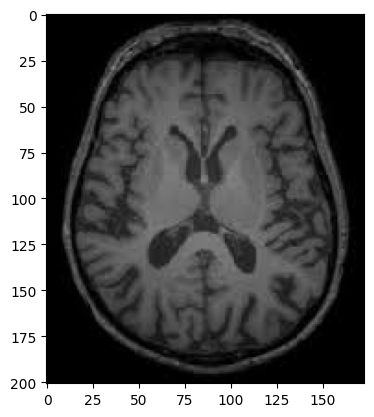

In [7]:
plt.imshow(img)
plt.show()



In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_gen.flow_from_directory('/content/drive/MyDrive/brain tumor/',
                                                target_size = (224,224),#
                                                batch_size = 32,
                                                class_mode = 'categorical')



Found 253 images belonging to 2 classes.


In [10]:
for x, y in train_generator:
  x, y = train_generator.next()
  print(x.shape, y.shape)
  break

(32, 224, 224, 3) (32, 2)


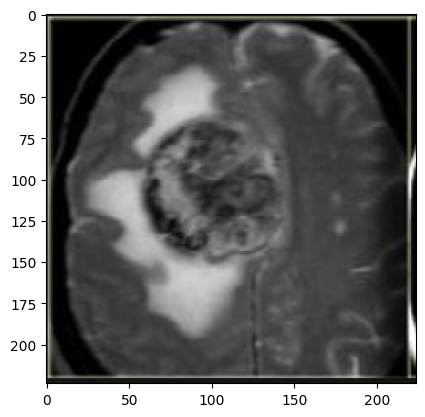

[0. 1.]


In [11]:
plt.imshow(x[10])
plt.show()
print(y[10])



In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np

In [13]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape=(174, 174, 3))#??
base_model.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 174, 174, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 87, 87, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [14]:
for layer in base_model.layers:
  layer.trainable = True


In [15]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2, activation = 'softmax')(x)


In [16]:
model = Model(inputs = base_model.input, outputs = x)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 174, 174, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 87, 87, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 87, 87, 64)   256         ['conv1_conv[0][0]']         

In [18]:

from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics=["accuracy"])

In [19]:

history = model.fit_generator(
    train_generator,
    epochs = 15,
    steps_per_epoch = 7
  )


<ipython-input-19-a7be66b34573>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
7/7 [==============================] - 206s 24s/step - loss: 0.5867 - accuracy: 0.7828
Epoch 2/15
7/7 [==============================] - 168s 24s/step - loss: 0.2832 - accuracy: 0.8616
Epoch 3/15
7/7 [==============================] - 172s 25s/step - loss: 0.3034 - accuracy: 0.9186
Epoch 4/15
7/7 [==============================] - 168s 24s/step - loss: 0.2319 - accuracy: 0.9276
Epoch 5/15
7/7 [==============================] - 171s 25s/step - loss: 0.1108 - accuracy: 0.9683
Epoch 6/15
7/7 [==============================] - 173s 25s/step - loss: 0.0509 - accuracy: 0.9911
Epoch 7/15
7/7 [==============================] - 168s 24s/step - loss: 0.0553 - accuracy: 0.9819
Epoch 8/15
7/7 [==============================] - 164s 23s/step - loss: 0.1723 - accuracy: 0.9548
Epoch 9/15
7/7 [==============================] - 164s 23s/step - loss: 0.0538 - accuracy: 0.9819
Epoch 10/15
7/7 [==============================] - 168s 24s/step - loss: 0.0335 - accuracy: 0.9864
Epoch 11/15
7/7 [==

this shows 100% accuracy.
and loss is 0.13%.